# Data Science Regression Project: Predicting Home Prices in Bengaluru


Dataset is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [1]:
# Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)  ##Setting the figure size 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Data Load: Load banglore home prices into a dataframe
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
# grouping by area type and having count of each type
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
#dropping the elements which from my pov do not affect the price 
df1 = df.drop(['area_type','availability','society', 'balcony'], axis = 'columns')
df1.shape

(13320, 5)

In [6]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Data Cleaning
1. Handling NAN values 
2. Handling non uniformities

In [7]:
df1.isnull().sum()    #tells us number of rows in each column where value is NAN

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df2 = df1.dropna()  #removes rows from the DataFrame df1 that contain any missing values (NaN values) and assigns 
                    #the resulting DataFrame to df2.

In [9]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

## Feature Engineering
### **Add new feature(integer) for bhk (Bedrooms Hall Kitchen)**

In [11]:
# Creating a new column bhk  by transforming the size column 
df2['bhk'] = df2['size'].apply(lambda x :int( x.split(' ')[0]))

In [12]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except: 
        return False 
    return True

In [17]:
df2[~df2['total_sqft'].apply(is_float)].head(10) # ~ returns those values where total_sqft is not float whereas it is a range 

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


***Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple***

In [18]:
## python function which takes range as input and returns float value.
def convert_sqft_to_num(x):
    tokens = str('x').split('-')
    if len(tokens) == 2:
        return(float(tokens[0]) + float(tokens)[1])/2
    try:
        return float(x)
    except:
        return None

In [19]:
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num)
df3 = df3[df3.total_sqft.notnull()]
df3.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [20]:
df3.iloc[30]


location      Bisuvanahalli
size                  3 BHK
total_sqft           1075.0
bath                    2.0
price                  35.0
bhk                       3
Name: 31, dtype: object


### **Add new feature called price per square feet**

In [21]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [22]:
len(df4.location.unique())

1298

In [23]:
df4.location = df4.location.apply(lambda x : x.strip())


In [24]:
location_stats = df4.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1287, dtype: int64

In [25]:
len(location_stats[location_stats<=10])

1048

### Dimensionality Reduction
**Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns**

In [26]:
location_stats_less_than_10 =location_stats[location_stats<=10]
location_stats_less_than_10.head(30)

location
1 Annasandrapalya                                   1
1 Giri Nagar                                        1
1 Immadihalli                                       1
1 Ramamurthy Nagar                                  1
12th cross srinivas nagar banshankari 3rd stage     1
1A Block Koramangala                                1
1Channasandra                                       1
1Hanuman Nagar                                      1
1Hoysalanagar                                       1
1Kasavanhalli                                       1
1st Block BEL Layout                                2
1st Block HBR Layout                                3
1st Block HRBR Layout                               8
1st Block Koramangala                              10
1st Stage Domlur                                    1
1st Stage Indira Nagar                              5
1st Stage Radha Krishna Layout                      1
2Electronic City Phase II                           1
2nd Block Bel Layou

In [27]:
df4.location = df4.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

240

In [28]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


### Outlier Removal Using Business Logic
**As a data scientist when we have a conversation with our business manager (who has expertise in real estate), he will tell us that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If we have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [29]:
#Removal of Outlier
df4[df4.total_sqft/df4.bhk< 300].head() 


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [30]:
df4.shape

(13056, 7)

In [31]:
df5 = df4[~(df4.total_sqft/df4.bhk< 300)]

In [32]:

df5.shape

(12312, 7)

### Outlier Removal Using Standard Deviation and Mean

In [33]:
df5.price_per_sqft.describe()

count     12312.000000
mean       6323.403514
std        4187.211055
min         267.829813
25%        4208.545855
50%        5300.000000
75%        6938.987948
max      176470.588235
Name: price_per_sqft, dtype: float64

***Here we find that min price per sqft is 267 rs/sqft whereas max is 176471.58, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation***

In [34]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape


(10146, 7)

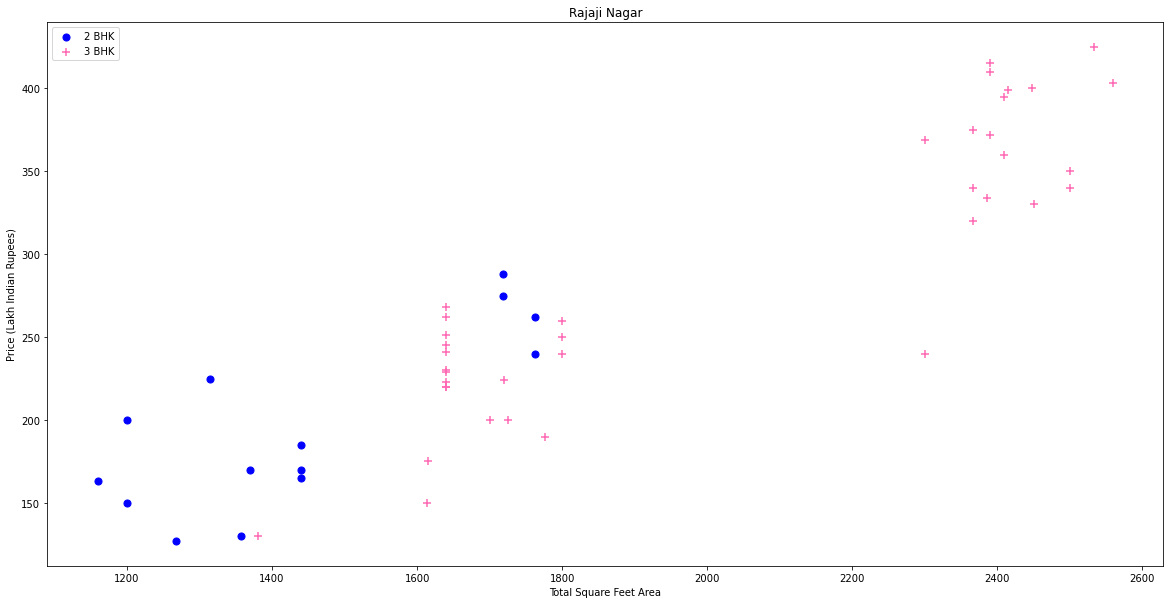

In [35]:
#Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='hotpink',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

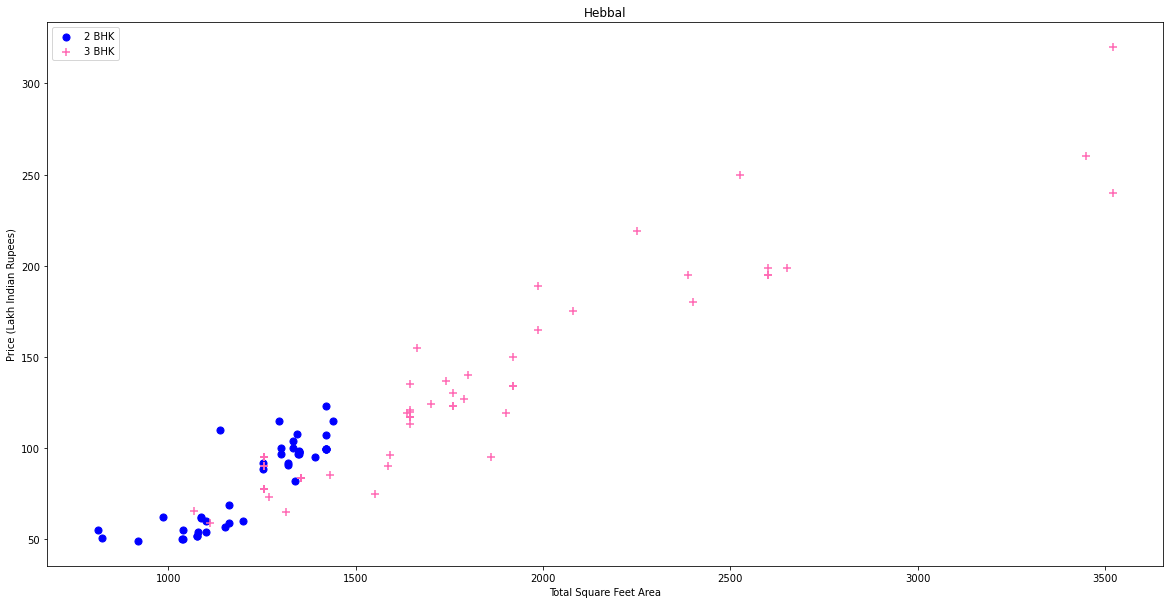

In [36]:
plot_scatter_chart(df6,"Hebbal")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}


**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**


In [37]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
# df7 = df6.copy()
df7.shape

(7206, 7)

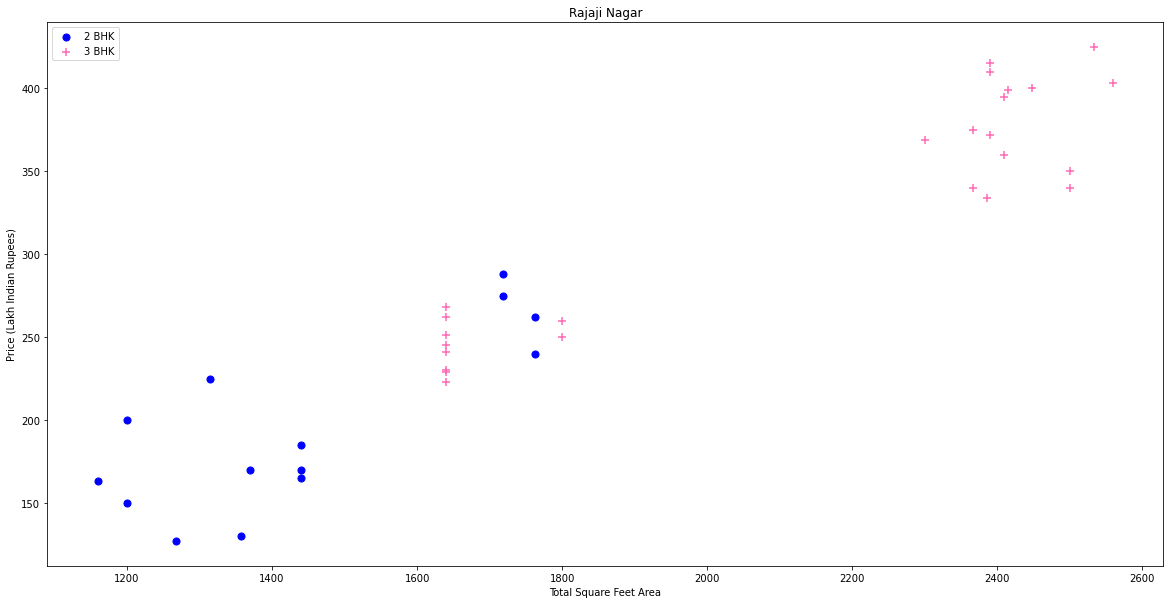

In [38]:
#Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

plot_scatter_chart(df7,"Rajaji Nagar")


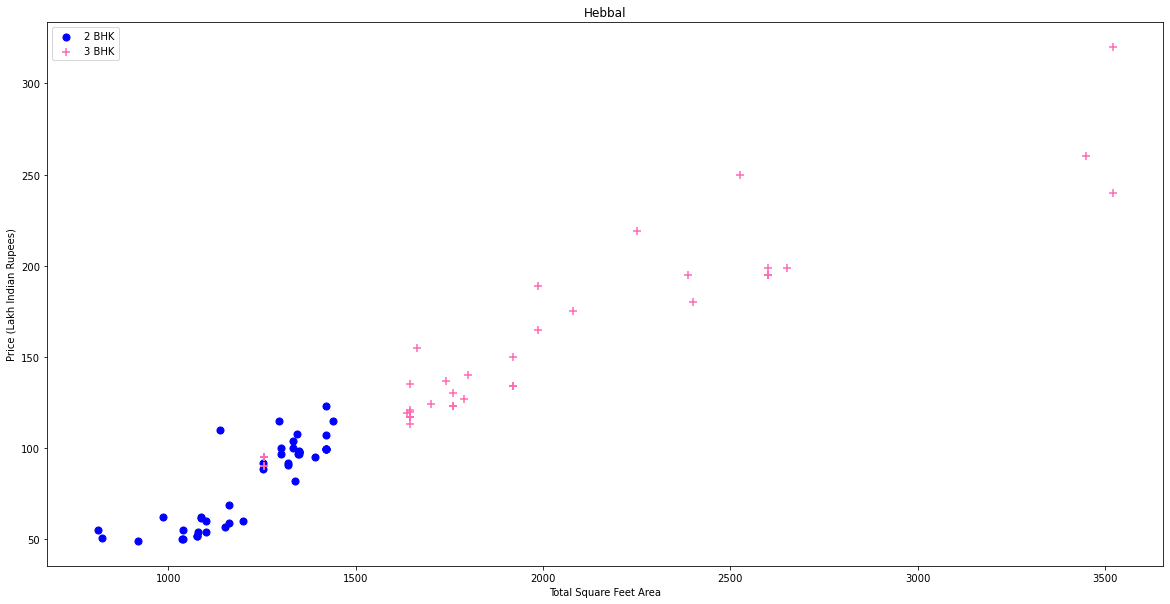

In [39]:
plot_scatter_chart(df7,"Hebbal")

Text(0, 0.5, 'Count')

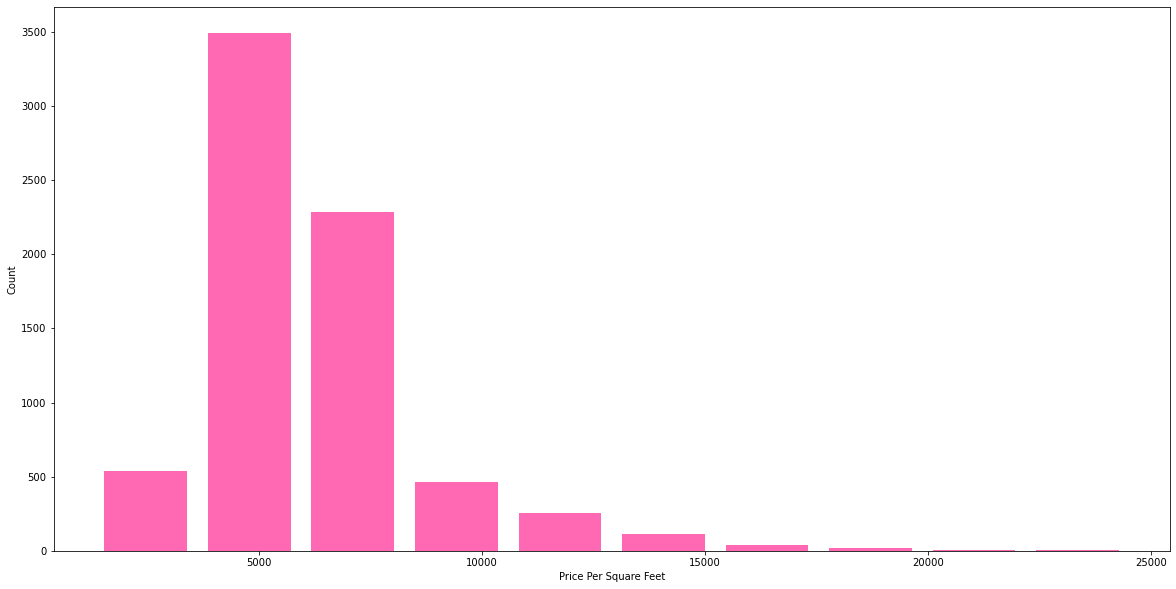

In [40]:
import matplotlib
plt.hist(df7.price_per_sqft,rwidth=0.8, color = 'hotpink')
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [41]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [42]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5217,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8384,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8473,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9209,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9539,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

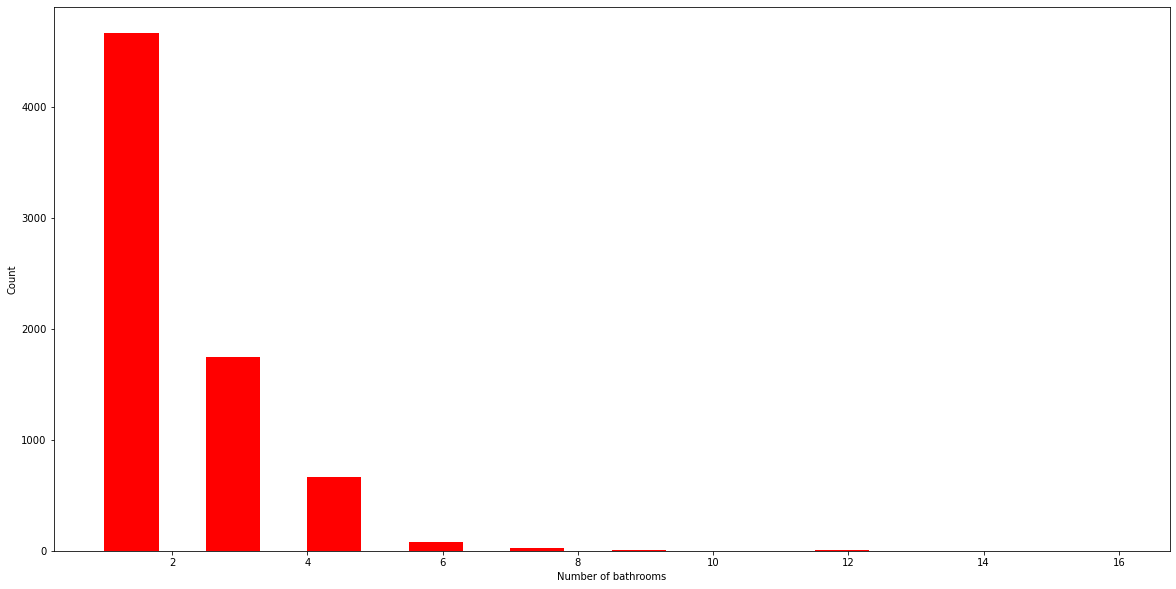

In [43]:
plt.hist(df7.bath , width = 0.8 , color = 'red')
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

**If we have bathrooms greater than bedroom + 2 we can mark them as outlier said by the business manager**

In [44]:
df7[df7.bath>df7.bhk +2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1611,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5178,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6635,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8309,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [45]:
df8 = df7[df7.bath<df7.bhk +2]
df8.shape

(7133, 7)

In [46]:
df9 = df8.drop(['size', 'price_per_sqft'], axis = 'columns')
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## Use One Hot Encoding For Location

In [47]:
dummies = pd.get_dummies(df9.location)

In [48]:
df10 = pd.concat([df9 , dummies.drop('other', axis = 'columns')], axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df11 = df10.drop('location' , axis = 'columns')
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df11.shape

(7133, 243)

### Building a Model 

In [51]:
X = df11.drop('price' , axis = 'columns')

In [52]:
y = df11.price

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [54]:
from sklearn.linear_model import LinearRegression
r = LinearRegression()
r.fit(X_train , y_train)
r.score(X_test, y_test)

0.8516206252019138

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [55]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.78439478, 0.81053841, 0.79881639, 0.84805536, 0.86183798,
       0.8540246 , 0.8780587 , 0.84866365, 0.86923586, 0.83142362])

**We want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

## Find best model using GridSearchCV


In [56]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.838505,{'normalize': False}
1,lasso,0.697726,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.717073,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

## Testing the model for few properties

In [57]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return r.predict([x])[0]

In [58]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

84.83674304661928

In [59]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

88.3620854984541

In [60]:
predict_price('Indira Nagar',1000, 2, 2)


195.52838740812842

In [61]:
predict_price('Indira Nagar',1000, 3, 3)

199.05372985996325